In [2]:
import pandas as pd
import numpy as np

In [5]:
charts = pd.read_csv('tracks_with_features.csv')
charts.info()
charts.describe()
print(charts["artist"].nunique(), charts["title"].nunique(), charts["key"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330074 entries, 0 to 330073
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330074 non-null  object 
 1   rank            330074 non-null  int64  
 2   title           330074 non-null  object 
 3   artist          330074 non-null  object 
 4   last-week       297763 non-null  float64
 5   peak_rank       330074 non-null  int64  
 6   weeks-on-board  330074 non-null  int64  
 7   country         330074 non-null  object 
 8   track_id        330074 non-null  object 
 9   year            330074 non-null  int64  
 10  week            330074 non-null  int64  
 11  tempo           316934 non-null  object 
 12  key             316934 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 32.7+ MB
10205 24620 key
F major     25914
A# major    25087
C major     24461
D# major    21535
G# major    19905
G major     17067
A major     

In [6]:
charts["tempo"] = charts["tempo"].str.strip("[]").astype(float)

In [ ]:
charts = charts[charts["tempo"].notna()]


In [8]:
charts.info()


<class 'pandas.core.frame.DataFrame'>
Index: 316934 entries, 0 to 330073
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            316934 non-null  object 
 1   rank            316934 non-null  int64  
 2   title           316934 non-null  object 
 3   artist          316934 non-null  object 
 4   last-week       285801 non-null  float64
 5   peak_rank       316934 non-null  int64  
 6   weeks-on-board  316934 non-null  int64  
 7   country         316934 non-null  object 
 8   track_id        316934 non-null  object 
 9   year            316934 non-null  int64  
 10  week            316934 non-null  int64  
 11  tempo           316934 non-null  float64
 12  key             316934 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 33.9+ MB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


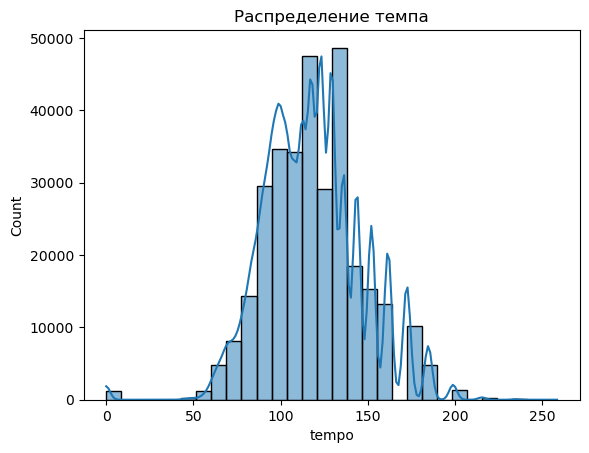

In [11]:
sns.histplot(charts["tempo"], bins=30, kde=True)
plt.title("Распределение темпа")
plt.show()


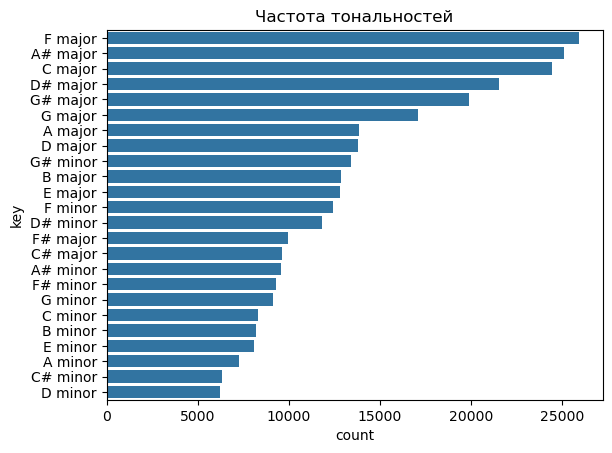

In [12]:
sns.countplot(y="key", data=charts, order=charts["key"].value_counts().index)
plt.title("Частота тональностей")
plt.show()


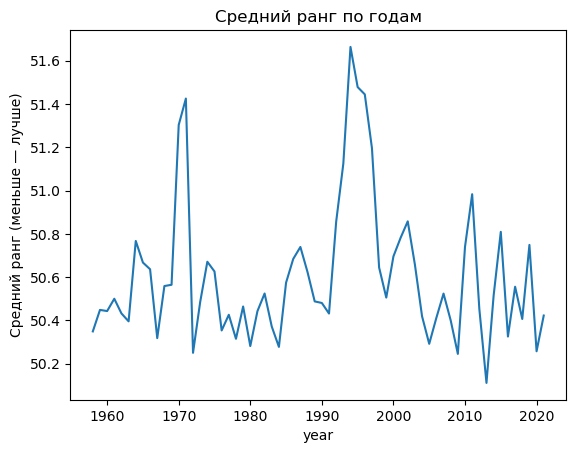

In [13]:
charts.groupby("year")["rank"].mean().plot(kind="line")
plt.title("Средний ранг по годам")
plt.ylabel("Средний ранг (меньше — лучше)")
plt.show()


In [14]:
top_artists = charts[charts["rank"] == 1]["artist"].value_counts().head(10)
print(top_artists)


artist
Mariah Carey           65
The Beatles            51
Drake                  31
Michael Jackson        30
Whitney Houston        30
Madonna                30
The Black Eyed Peas    28
Bee Gees               27
Adele                  26
Usher                  22
Name: count, dtype: int64


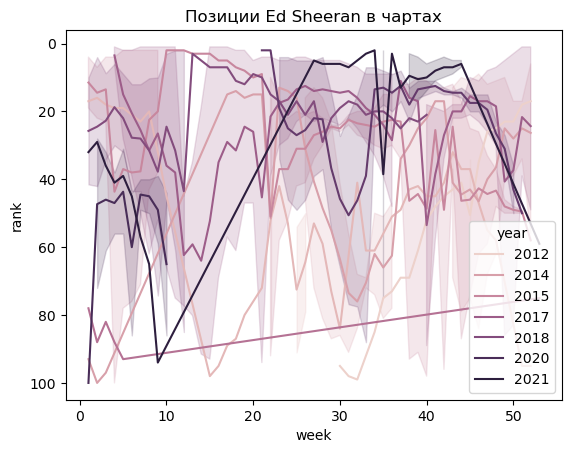

In [15]:
artist = "Ed Sheeran"
df_artist = charts[charts["artist"].str.contains(artist, case=False)]
sns.lineplot(x="week", y="rank", hue="year", data=df_artist)
plt.gca().invert_yaxis()  # так как rank=1 — лучшее место
plt.title(f"Позиции {artist} в чартах")
plt.show()


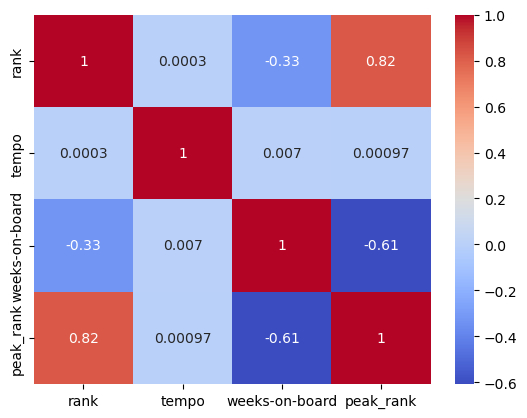

In [16]:
sns.heatmap(charts[["rank", "tempo", "weeks-on-board", "peak_rank"]].corr(), annot=True, cmap="coolwarm")
plt.show()
